# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Задача
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

#Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### 1. Откроем файл с данными и изучим общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
from copy import copy
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Из описания можно сделать вывод, что есть пропуски в данных.

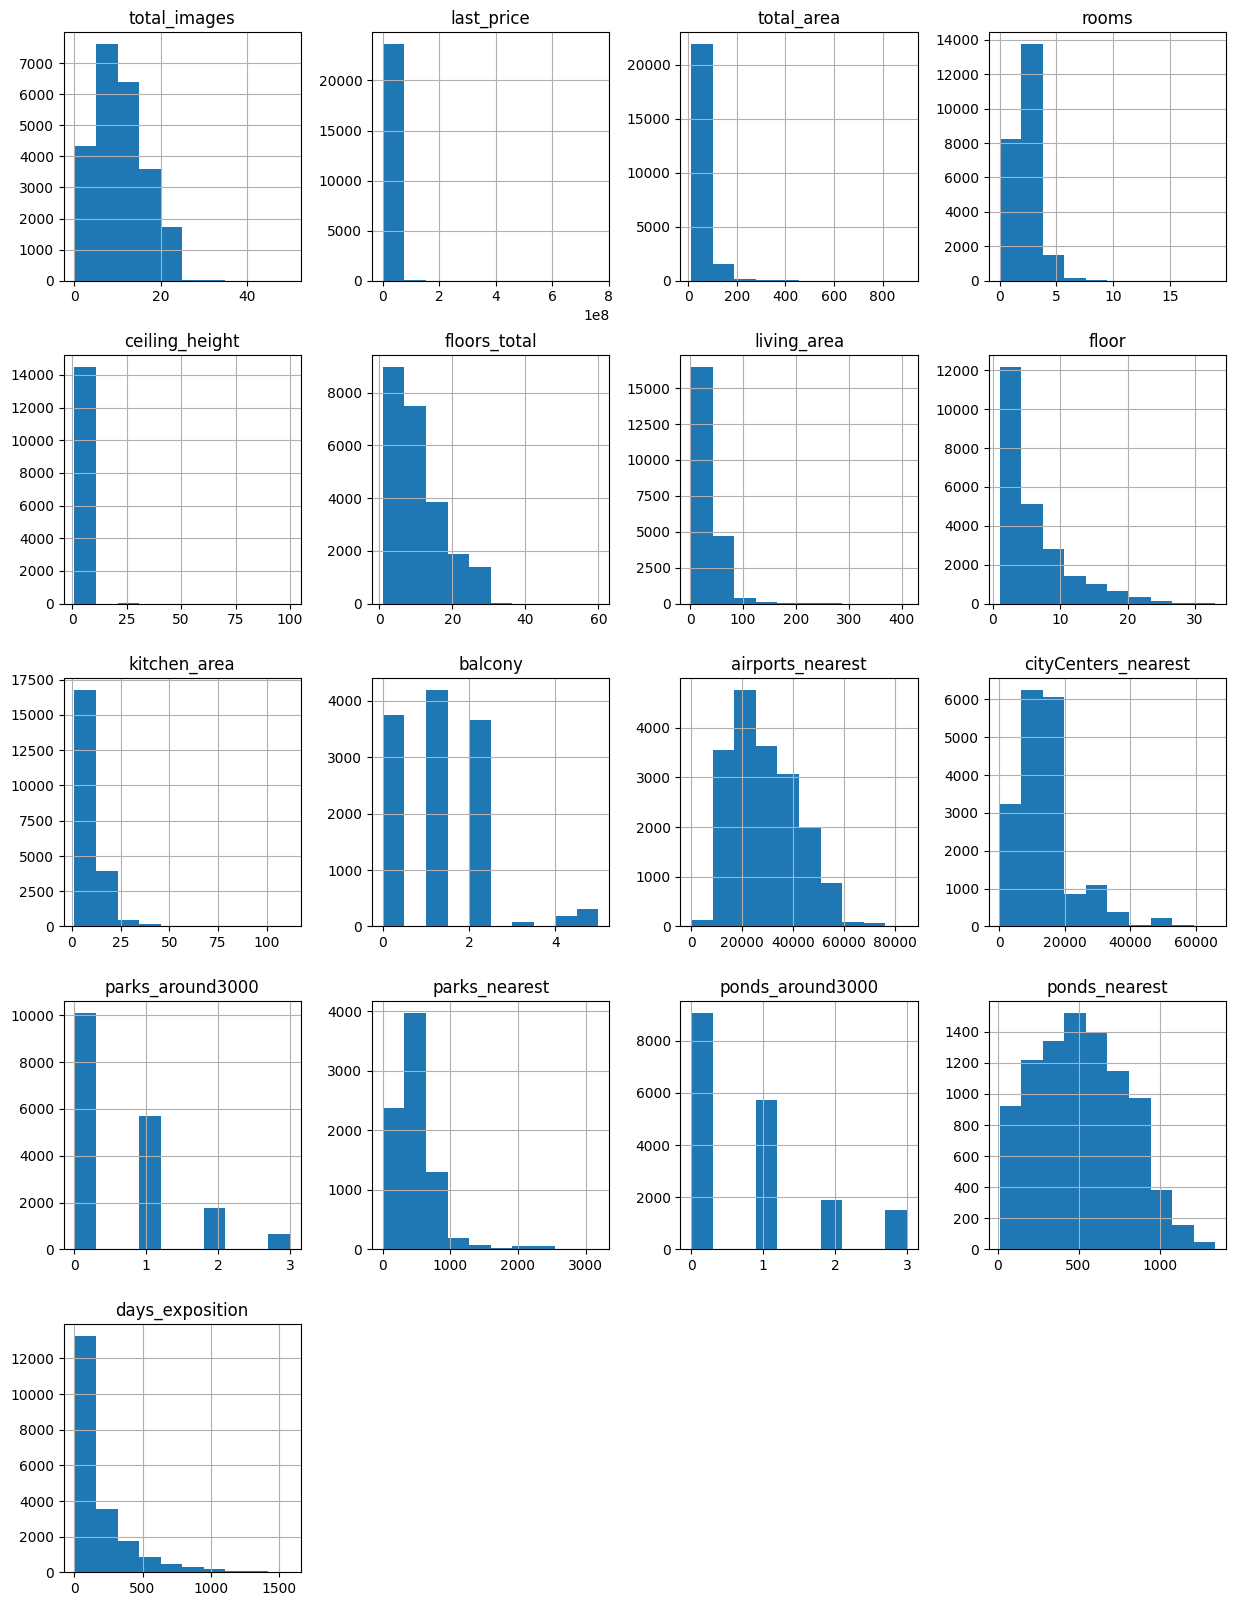

In [ ]:
data.hist(figsize=(15, 20));

Как видно из гистограмм в столбце высоты потолков (ceiling_height) есть аномальные значения, расстояние до аэропорта содержит значение 0

last_price, total_area, living_area, rooms, kitchen_area содержат выбросы, скорее всего в выборку попала очень большая квартира, которая влияет на общую картину

# 2. Предобработка данных

In [ ]:
# Переименуем столбец cityCenters_nearest
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

### 2.1. Найдем столбцы с пропусками


In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Значения в некоторых столбцах могли не заполнять, потому что этот параметр отсутсвует, например если в радиусе 3 км нет ни водоемов, ни парков, то можно пропустить этот параметр при заполнении датафрейма, такая же ситуация с количеством балконов и апартаментов. Высоту потолков можно заполнить медианным значением.

В остальных столбцах данные могут отсутствовать по другим причинам, ошибке при записи, человеческий фактор (забыли указать) или отсутствие информации о параметре

In [ ]:
data['ceiling_height'].median()

2.65

In [ ]:
data[['balcony', 'ponds_around3000', 'is_apartment', 'parks_around3000']] = (data[['balcony', 'ponds_around3000', 'is_apartment', 'parks_around3000']]
                                                                             .fillna(value=0))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### 2.2. Преобразование типов данных

Посмотрим есть ли типы данных, которые нужно преобразовать

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# Проверим представлена ли цена целыми числами
for price in data.last_price.unique():
  if not float(price).is_integer():
    print(price)

Как видно из метода info() количество этажей в доме (floors_total), количество балконов (balcony), цена на момент снятия публикации (last_price) не содержат дробной части (она равна 0), что дает право изменить тип данных на целочисленный (int64), а является ли помещение апартаментами (is_apartment) должно быть булевым типом (bool). Изменим типы данных на подходящие

Количество этажей или балконов не может быть дробным, а цена представлена в числах с нулевой дробной частью.

In [ ]:
float64_cols = list(data.select_dtypes(include='float64'))
data[float64_cols] = data[float64_cols].astype('float32')

In [ ]:
#floors_total -> int64  balcony -> int64   first_day_exposition-> datetime   days_exposition -> int64 last_price -> int64 is_apartment-> bool
data = data.astype({'floors_total': 'int32', 'balcony': 'int32', 'days_exposition': 'int32', 'last_price': 'int32', 'is_apartment': 'bool'}, errors='ignore')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### 2.3. Устранение неявных дубликатов

В столбце locality_name есть неявные дубликаты, устраним их

In [ ]:
# Посмотрим на список уникальных значение столбца locality_name
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# Отбросим все слова начинающиеся с маленькой буквы, таким образом останутся только названия населенных пунктов
data["drop_dupl_locality_name"] = data["locality_name"].str.replace("\\b\ *[a-zа-яё]{3,}\ *\\b", "").str.replace("ё", "е")

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,drop_dupl_locality_name
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.000000,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int32         
 2   total_area               23699 non-null  float32       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float32       
 6   floors_total             23613 non-null  float32       
 7   living_area              21796 non-null  float32       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             21421 n

Обработка аномалий в столбце ceiling_height
Согласно своду правил СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные» минимальная выcoта потолка в центральной России 2,5 м.
В связи с этим значения от 25 будут заменены на меньшее в 10 раз

Высота потолков больше 4 метров вызывает подозрения, такая высота потолков встречается в элитном жилье (и то до 6 метров), так что удалим данные по этим квартирам

Расстояние до аэропрта 0 - странное дело, в аэропорту нет квартир, исключим эту квартиру из выборки

Квартира со стоимостью 12190 похожа на аномалию, удалим эти данные

Квартиры с площадью больше 500 $м^2$ будем считать элитной недвижимостью, их немного и они могут исказить данные, удалим эти квартиры

In [ ]:
data.loc[data['ceiling_height'] >= 25] = (
data.loc[data['ceiling_height'] >= 25].replace(
    to_replace=[25.0, 26.0, 27.0, 32.0, 100.0, 27.5], value=[2.5, 2.6, 2.7, 3.2, 10.0, 2.75]))

In [ ]:
data['ceiling_height'].sort_values().unique()

array([ 1.        ,  1.20000005,  1.75      ,  2.        ,  2.20000005,
        2.25      ,  2.29999995,  2.33999991,  2.4000001 ,  2.45000005,
        2.46000004,  2.47000003,  2.48000002,  2.49000001,  2.5       ,
        2.50999999,  2.51999998,  2.52999997,  2.53999996,  2.54999995,
        2.55999994,  2.56999993,  2.57999992,  2.58999991,  2.5999999 ,
        2.6       ,  2.6099999 ,  2.61999989,  2.63000011,  2.6400001 ,
        2.6500001 ,  2.66000009,  2.67000008,  2.68000007,  2.69000006,
        2.7       ,  2.70000005,  2.71000004,  2.72000003,  2.73000002,
        2.74000001,  2.75      ,  2.75999999,  2.76999998,  2.77999997,
        2.78999996,  2.79999995,  2.80999994,  2.81999993,  2.82999992,
        2.83999991,  2.8499999 ,  2.8599999 ,  2.86999989,  2.88000011,
        2.8900001 ,  2.9000001 ,  2.91000009,  2.92000008,  2.93000007,
        2.94000006,  2.95000005,  2.96000004,  2.97000003,  2.98000002,
        2.99000001,  3.        ,  3.00999999,  3.01999998,  3.02

In [ ]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [ ]:
data['airports_nearest'].min()

0.0

In [ ]:
data['last_price'].min()

12190

In [ ]:
data.query('total_area > 500')['total_area'].count()

7

In [ ]:
df = copy(data)

In [ ]:
df.drop(index=df.query('(kitchen_area < 2) or (airports_nearest < 1) or (last_price > 80000000 \
                                 or last_price < 100000) or (airports_nearest < 1) or (ceiling_height > 4) \
                                 or (ceiling_height < 2.5) or (rooms > 7)').index, inplace=True)

In [ ]:
# Проверим как много данных мы отбросили
df.shape[0] / data.shape[0]

0.991096670745601

In [ ]:
data = copy(df)

Во всех остальных столбцах данные не показывают аномальных значений

In [ ]:
# Проверим данные на наличие явных дубликатов
data.duplicated().sum()

0

# 3. Посчитаем и добавим в таблицу новые столбцы
цена одного квадратного метра;

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

месяц публикации объявления;

год публикации объявления;

тип этажа квартиры (значения — «‎первый», «последний», «другой»);

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
def floor_name(number, total_floor):
  if number == 1:
    return 'Первый'
  elif number == total_floor:
    return 'Последний'
  else:
    return 'Другой'

In [ ]:
data['price_per_squre_m'] = round(data['last_price'] / data['total_area'], 2)
data['publication_day'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year
data['floor_type'] = data.apply(lambda x: floor_name(x['floor'], x['floors_total']), axis=1)
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int64',errors='ignore')

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,drop_dupl_locality_name,price_per_squre_m,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,Другой,16.0
1,7,3350000,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,Первый,19.0
2,10,5196000,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,Другой,14.0
3,0,64900000,159.000000,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,Другой,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,Другой,8.0


# 4. Исследовательский анализ данных

### 4.1. Изучим следующие параметры объектов:

- общая площадь;

- жилая площадь;

- площадь кухни;

- цена объекта;

- количество комнат;

- высота потолков;

- этаж квартиры;

- тип этажа квартиры («первый», «последний», «другой»);

- общее количество этажей в доме;

- расстояние до центра города в метрах;

- расстояние до ближайшего аэропорта;

- расстояние до ближайшего парка;

- день и месяц публикации объявления.

In [ ]:
data['total_area'].describe()

count    23488.000000
mean        59.415924
std         31.408564
min          2.500000
25%         40.000000
50%         52.000000
75%         69.199997
max        517.000000
Name: total_area, dtype: float64

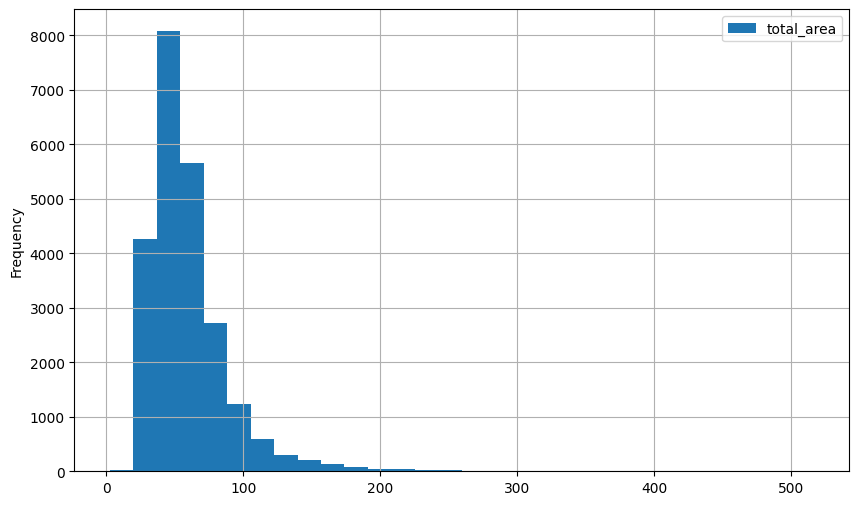

In [ ]:
data.plot(y='total_area', kind='hist', figsize=(10, 6), grid=True, bins=30);

Как видно из гистограммы явных аномалий нет. Распределение номрмальное со сдвигом вправо, пик распределения приходится на 53 $м^2$, значения больше 150 $м^2$ встречаются редко

In [ ]:
data['living_area'].describe()

count    21605.000000
mean        33.927382
std         19.906958
min          2.000000
25%         18.600000
50%         30.000000
75%         42.099998
max        332.000000
Name: living_area, dtype: float64

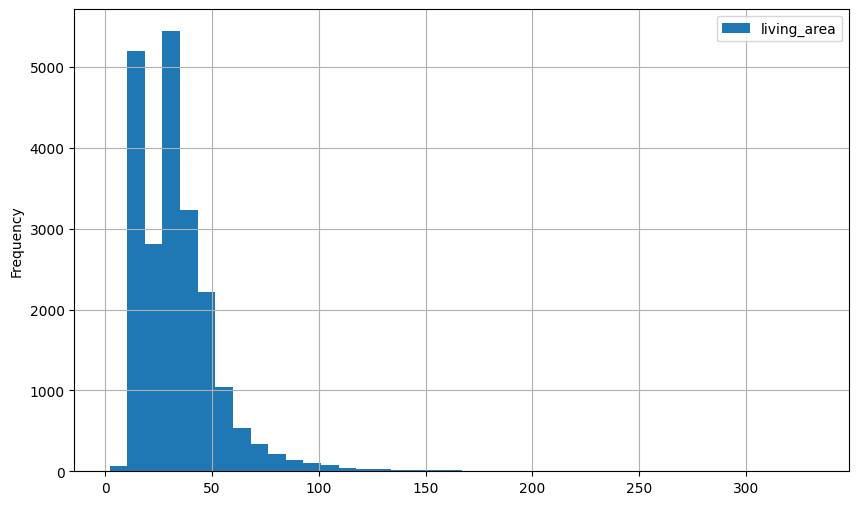

In [ ]:
data.plot(y='living_area', kind='hist', figsize=(10, 6), grid=True, bins=40);

здесь также видно номарльное распределение, большие значения есть, например 250 $м^2$, но они укладываются в логику столбца (может быть квартира с такой жилой площадью)

In [ ]:
data['kitchen_area'].describe()

count    21238.000000
mean        10.486285
std          5.576087
min          2.000000
25%          7.000000
50%          9.100000
75%         12.000000
max        100.699997
Name: kitchen_area, dtype: float64

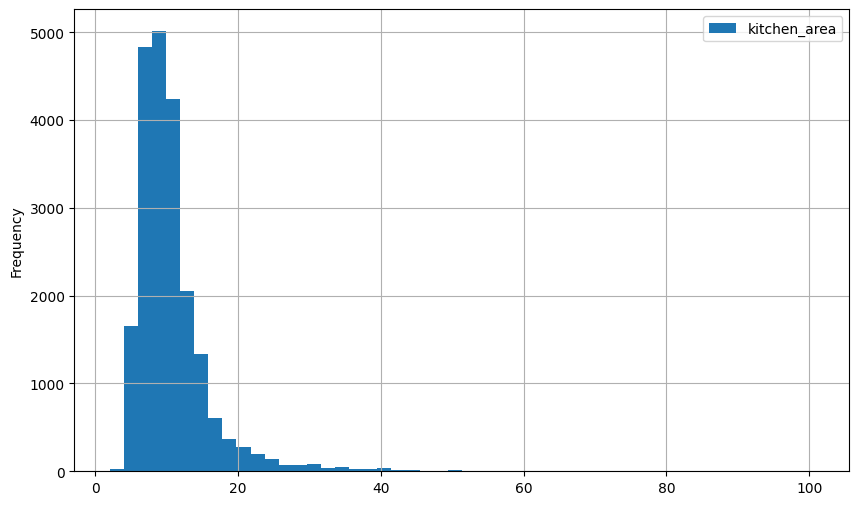

In [ ]:
data.plot(y='kitchen_area', kind='hist', figsize=(10, 6), grid=True, bins= 50);

Аналогично предыдущей гистограмме здесь тоже все  пределах нормы

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format
data['last_price'].describe()

count              23,488.00
mean            6,137,923.01
std             5,803,426.82
min               430,000.00
25%             3,400,000.00
50%             4,600,000.00
75%             6,700,000.00
max            80,000,000.00
Name: last_price, dtype: float64

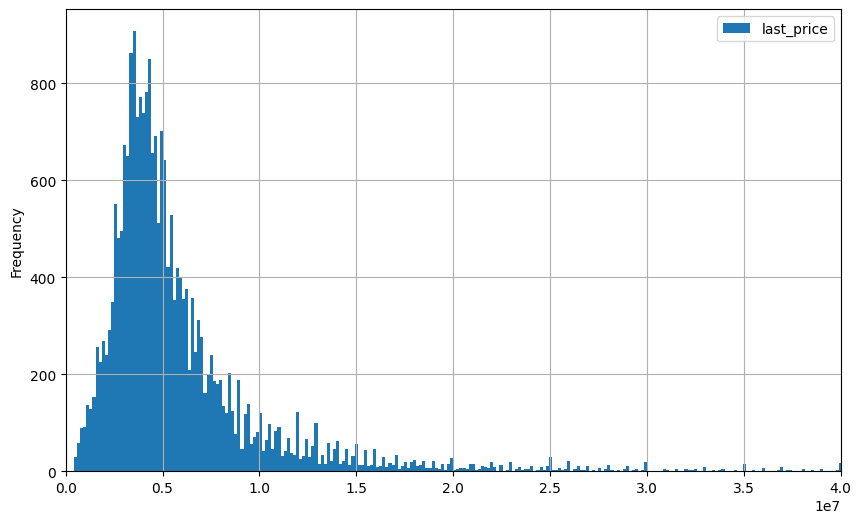

In [ ]:
data.plot(y='last_price', kind='hist', figsize=(10, 6), grid=True, bins=500, xlim=(0,40000000));

In [ ]:
data['rooms'].describe()

count              23,488.00
mean                    2.05
std                     1.03
min                     0.00
25%                     1.00
50%                     2.00
75%                     3.00
max                     7.00
Name: rooms, dtype: float64

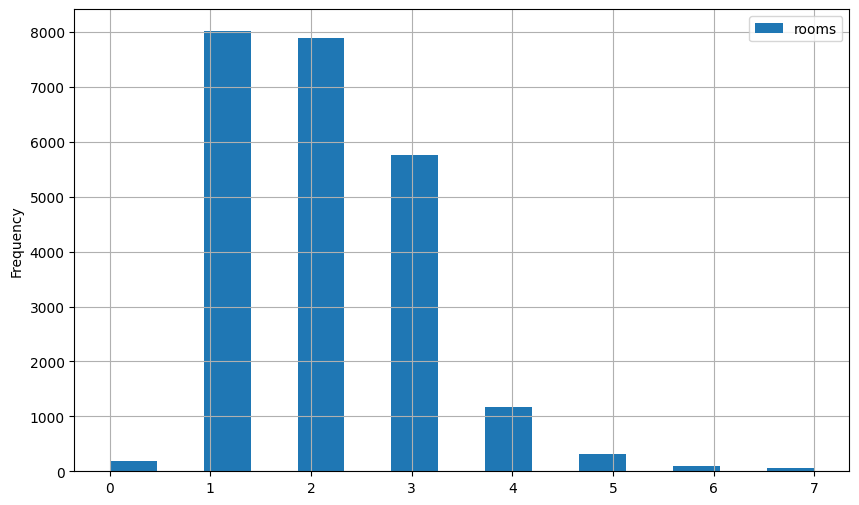

In [ ]:
data.plot(y='rooms', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

Тут тоже все хорошо, среднее количество комнат 2

In [ ]:
data['ceiling_height'].describe()

count              23,488.00
mean                    2.69
std                     0.20
min                     2.50
25%                     2.60
50%                     2.65
75%                     2.70
max                     4.00
Name: ceiling_height, dtype: float64

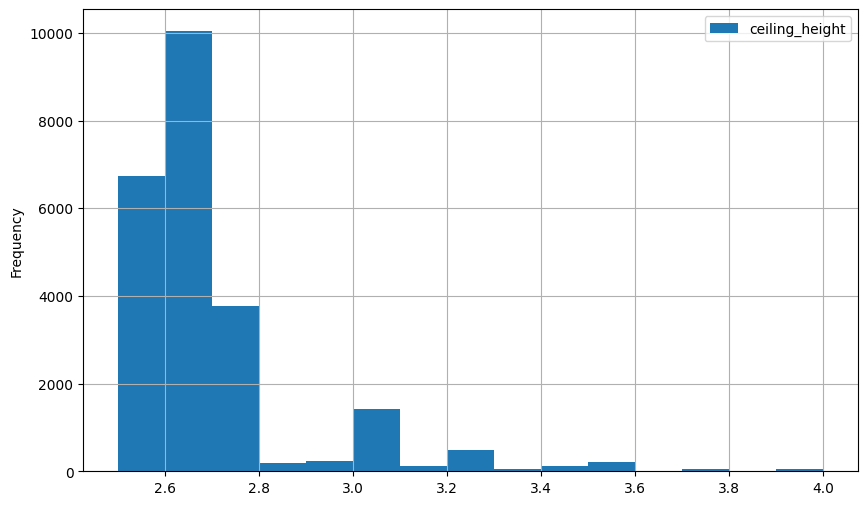

In [ ]:
data.plot(y='ceiling_height', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

Высота потолков не превышает 6 метров и начинается с 2.5, мы сами оставли только такие значения в данных, среднее значение 2.69

In [ ]:
data['floor'].describe()

count              23,488.00
mean                    5.90
std                     4.89
min                     1.00
25%                     2.00
50%                     4.00
75%                     8.00
max                    33.00
Name: floor, dtype: float64

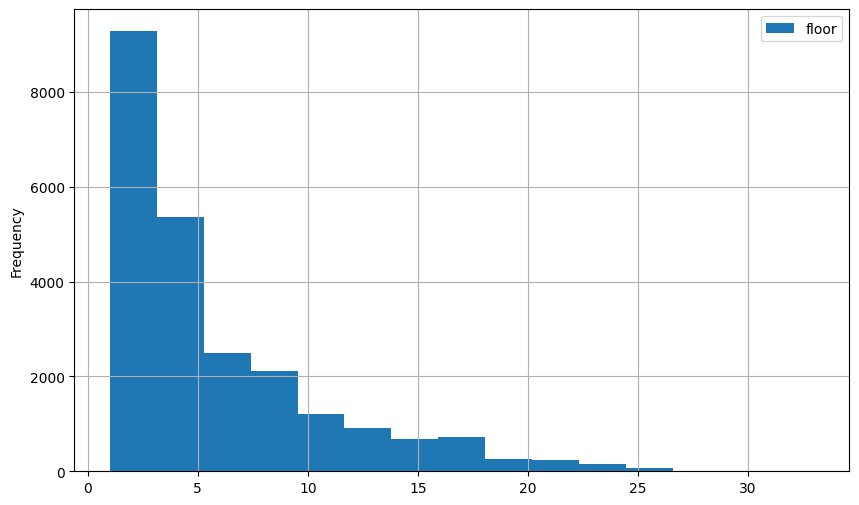

In [ ]:
data.plot(y='floor', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

В этаже квартир никаких аномалий.

In [ ]:
data['floor_type'].describe()

count      23488
unique         3
top       Другой
freq       17325
Name: floor_type, dtype: object

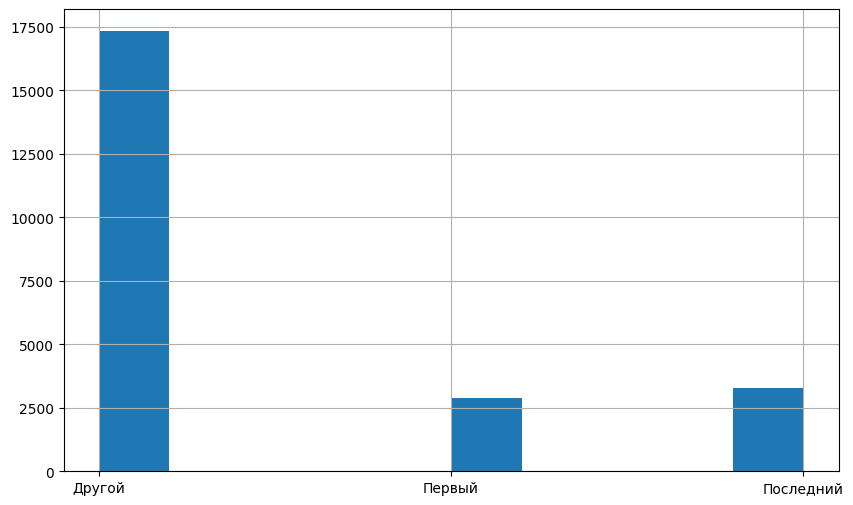

In [ ]:
data.floor_type.hist(figsize=(10, 6), grid=True);

Тип этажа - созданная нами категориальная переменная, из гистограммы можно сказть, что тип этажей "другой" самый популярный, к нему относится не одно значение как с "первым" и "последним этажом", а срез значений

In [ ]:
data['floors_total'].describe()

count              23,402.00
mean                   10.71
std                     6.60
min                     1.00
25%                     5.00
50%                     9.00
75%                    16.00
max                    60.00
Name: floors_total, dtype: float64

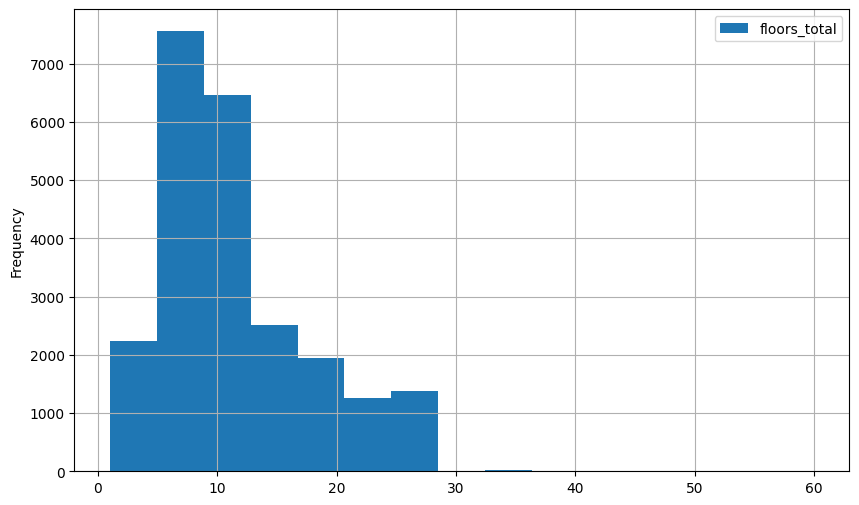

In [ ]:
data.plot(y='floors_total', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

Из гистограммы видно, что есть и частные дома, ведь всего этажей 1, так и небоскребы (60 этажей), но в основном продают в 9-тиэтажках

In [ ]:
data['city_centers_nearest'].describe()

count              18,006.00
mean               14,247.89
std                 8,598.10
min                   181.00
25%                 9,356.00
50%                13,142.00
75%                16,316.75
max                65,968.00
Name: city_centers_nearest, dtype: float64

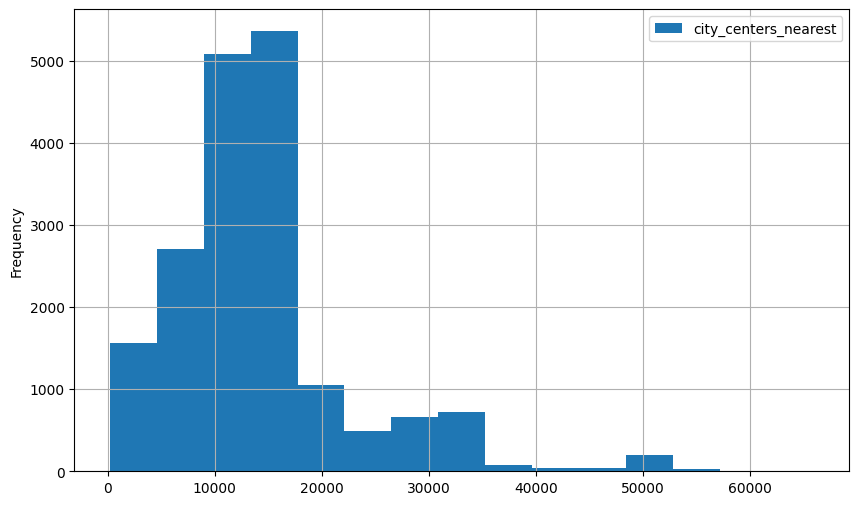

In [ ]:
data.plot(y='city_centers_nearest', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

Из гистограммы видно, что до цетра города в основном 13 км

In [ ]:
data['airports_nearest'].describe()

count              17,986.00
mean               28,821.29
std                12,659.22
min                 6,450.00
25%                18,551.00
50%                26,773.00
75%                37,347.75
max                84,869.00
Name: airports_nearest, dtype: float64

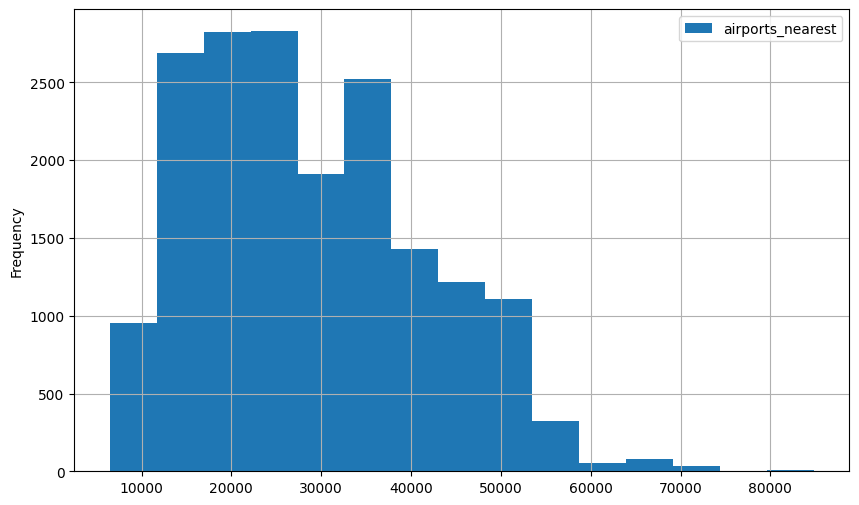

In [ ]:
data.plot(y='airports_nearest', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

Минимальное расстояние до аэропорта ~7 км, а максимальное 80 км, что поддается объяснению. В первом случае квартира в пригороде недалеко от аэропорта, а в последнем где-то далеко от Санкт-Петербурга и от аэропорта тоже

In [ ]:
data['parks_nearest'].describe()

count               7,957.00
mean                  491.32
std                   342.97
min                     1.00
25%                   288.00
50%                   455.00
75%                   613.00
max                 3,190.00
Name: parks_nearest, dtype: float64

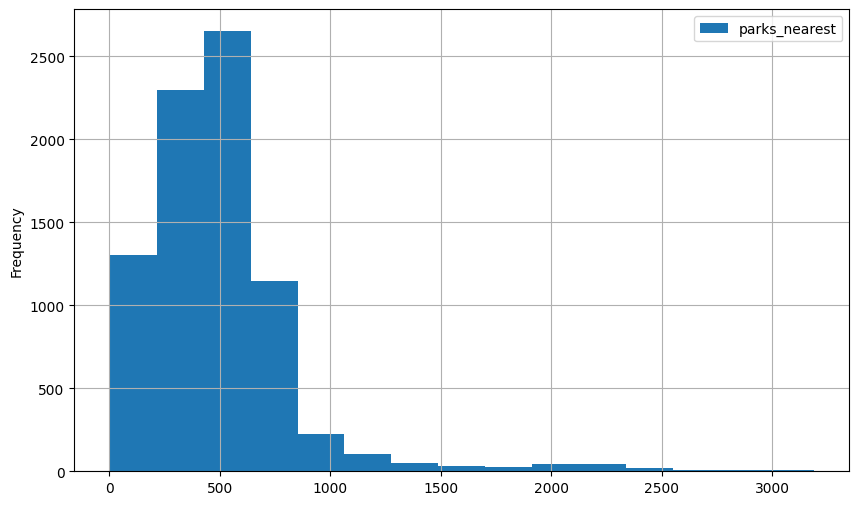

In [ ]:
data.plot(y='parks_nearest', kind='hist', figsize=(10, 6), grid=True, bins= 1 + int(np.log2(len(data))));

Минимум в этом столбце говорит о том, что около дома есть парк, среднее расстояние в 500 м говорит о том, что в Санкт-петербурге много парков с:

In [ ]:
data[['publication_day', 'publication_month']].describe()

,publication_day,publication_month
count,"23,488.00","23,488.00"
mean,2.57,6.40
std,1.79,3.49
min,0.00,1.00
25%,1.00,3.00
50%,3.00,6.00
75%,4.00,10.00
max,6.00,12.00


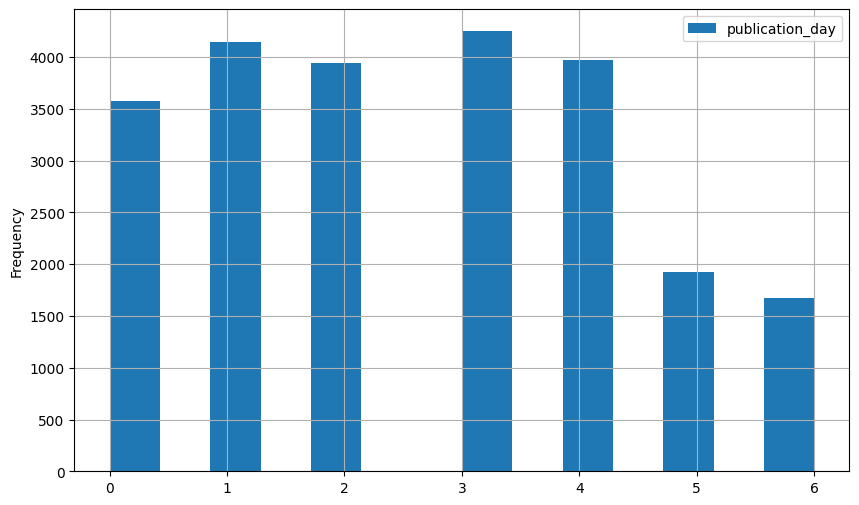

In [ ]:
data.plot(y='publication_day', kind='hist', figsize=(10, 6), grid=True, bins=14);

Чаще всего объявления публикуют в четверг и понедельник, а самый неактивный день - воскресение

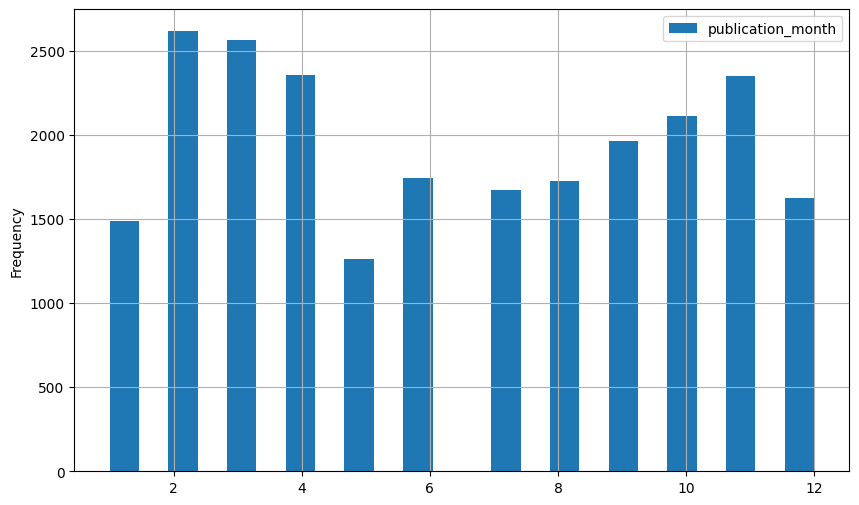

In [ ]:
data.plot(y='publication_month', kind='hist', figsize=(10, 6), grid=True, bins=24);

Самый популярный месяц для публикаций - февраль, в мае наоборот меньше всего опубликованных данных

### 4.2. Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

Построим гистограмму.

Посчитем среднее и медиану.

В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

In [ ]:
data.days_exposition.describe()

count              20,343.00
mean                  180.26
std                   219.13
min                     1.00
25%                    45.00
50%                    95.00
75%                   231.00
max                 1,580.00
Name: days_exposition, dtype: float64

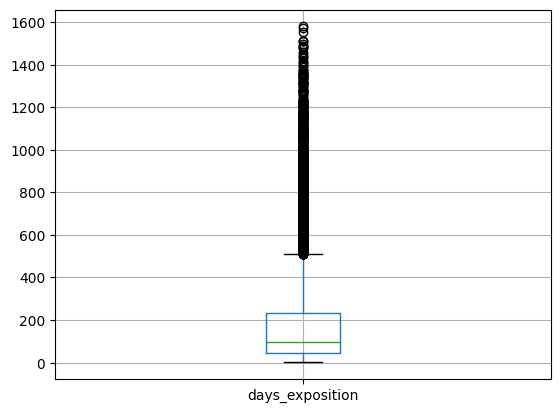

In [ ]:
data.boxplot(column='days_exposition');

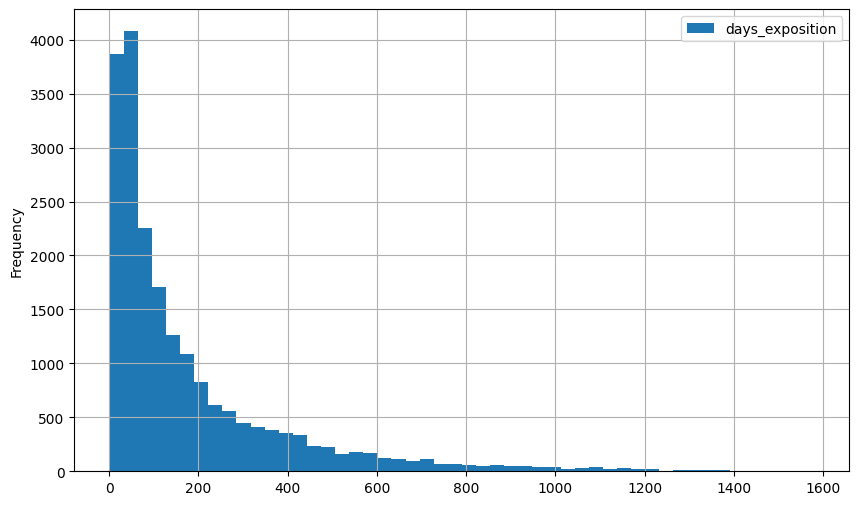

In [ ]:
data.plot(y='days_exposition', kind='hist',figsize=(10, 6), grid=True, bins=50);

В среднем квартиры продавались за 180 дней, медианным значением является 95 дней. Условно можно считать, что быстрые продажи те, которые завершились раньше среднего значения, а медленные те, что после. Необычно долгие те, которые не завершились 500 дней.

### 4.3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:

общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией используем сводные таблицы.

In [ ]:
# Создадим новый столбец для нахождения корреляции между типом этажа и ценой
dict_floor = {'Первый': 0, 'Другой': 1, 'Последний': 2}

In [ ]:
data['floor_type_number'] = data.floor_type.apply(lambda x: dict_floor[x])

In [ ]:
# Найдем корреляцию между параметрами и last_price
corr_list = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type_number']
for parametrs in corr_list:
  correlation = data['last_price'].corr(data[parametrs])
  print(f'Корреляция между ценой (last_price) и {parametrs} = {round(correlation, 2)}')

Корреляция между ценой (last_price) и total_area = 0.77
Корреляция между ценой (last_price) и living_area = 0.67
Корреляция между ценой (last_price) и kitchen_area = 0.59
Корреляция между ценой (last_price) и rooms = 0.47
Корреляция между ценой (last_price) и floor_type_number = 0.06


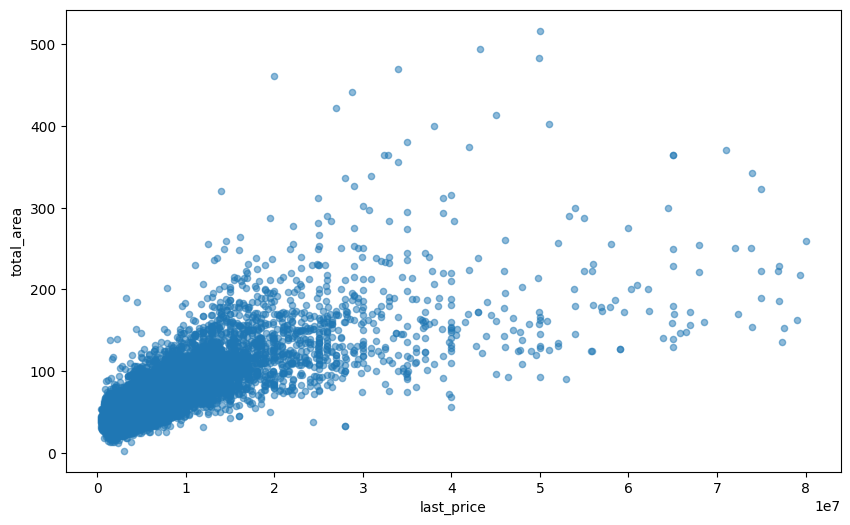

In [ ]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5, figsize=(10,6));

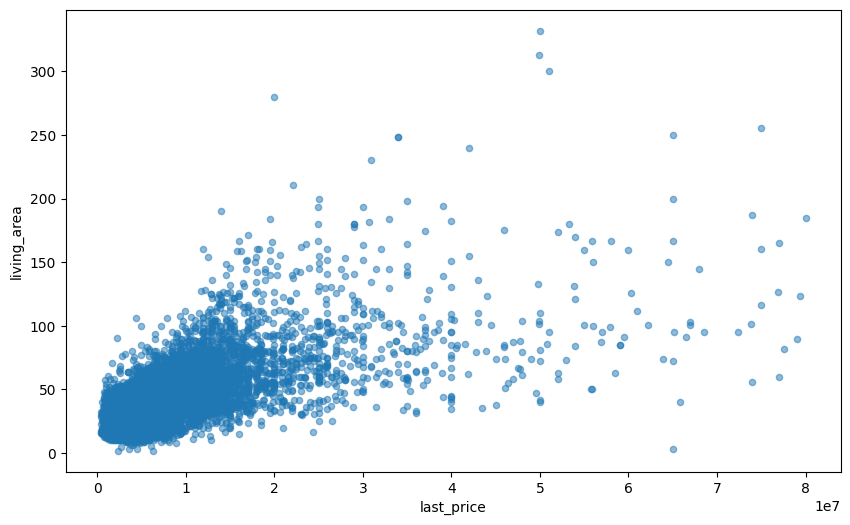

In [ ]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5, figsize=(10,6));

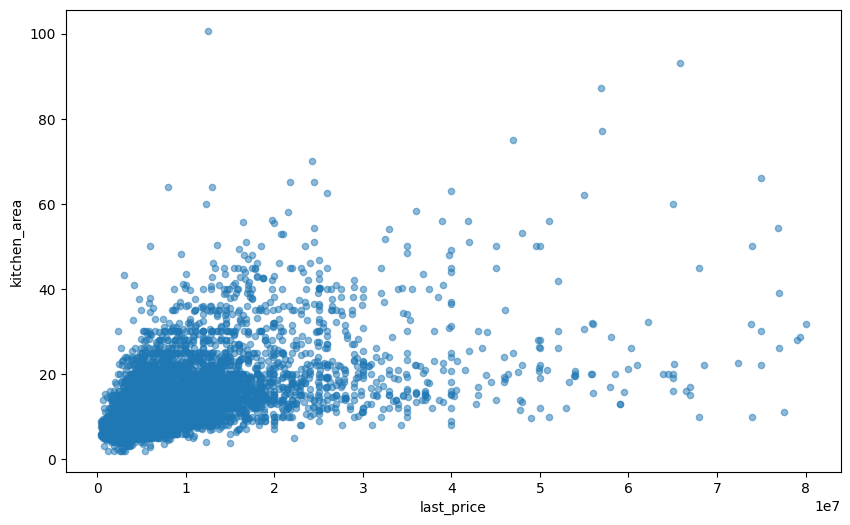

In [ ]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5, figsize=(10,6));

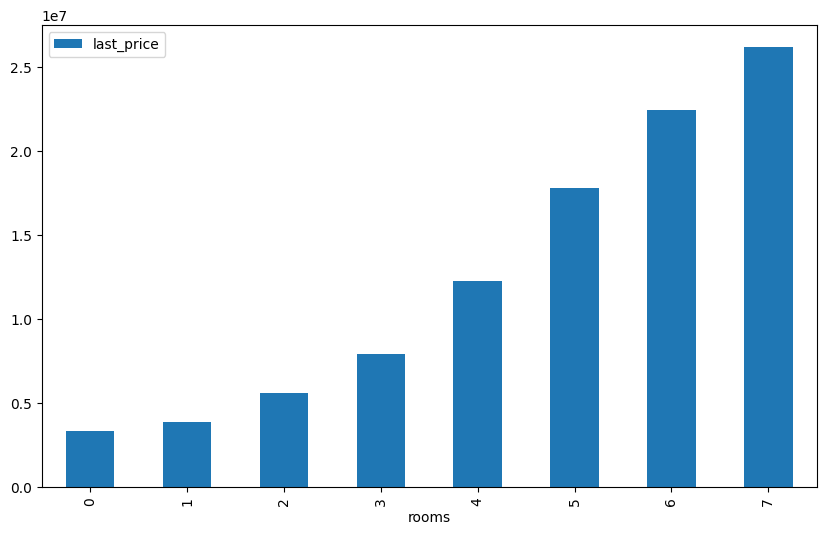

In [ ]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar', figsize=(10, 6));

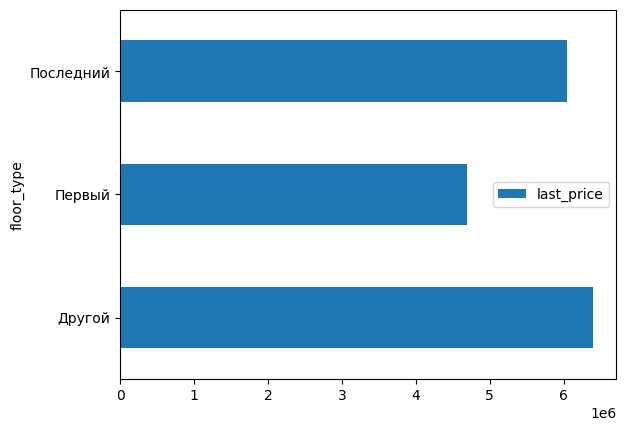

In [ ]:
data.pivot_table(index='floor_type',values='last_price').plot(y='last_price', kind='barh');

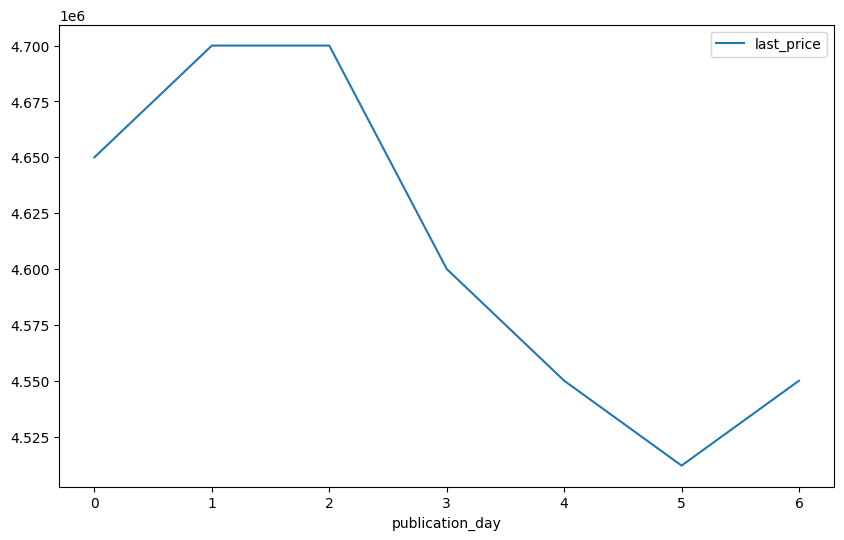

In [ ]:
data.pivot_table(index='publication_day', values='last_price', aggfunc='median').plot(y='last_price', kind='line', figsize=(10,6));

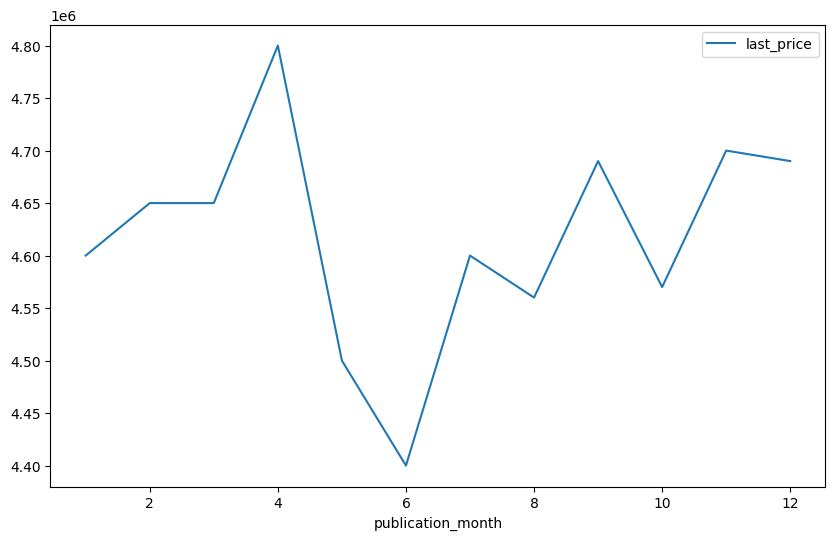

In [ ]:
data.pivot_table(index='publication_month', values='last_price', aggfunc='median').plot(y='last_price', kind='line', figsize=(10,6));

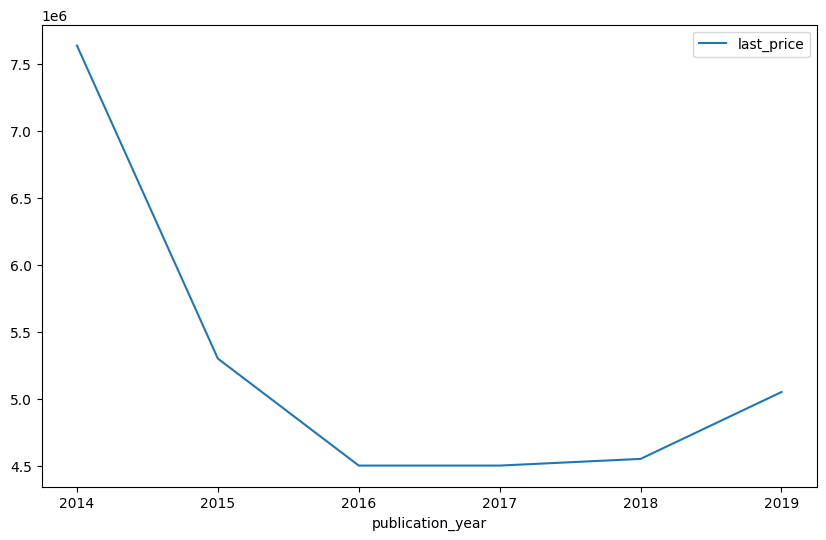

In [ ]:
data.pivot_table(index='publication_year', values='last_price', aggfunc='median').plot(y='last_price', kind='line', figsize=(10,6));

Прямая линейная завсимость цены квартиры с:
- общей площадью
- жилой площадью
- площадью кухни
- количества комнат

Практически нет зависимости цены от:
- даты публикации обяъвления
- этажа, на котром расположена квартира

В дополнение к исследованию построим таблицу корреляции призников

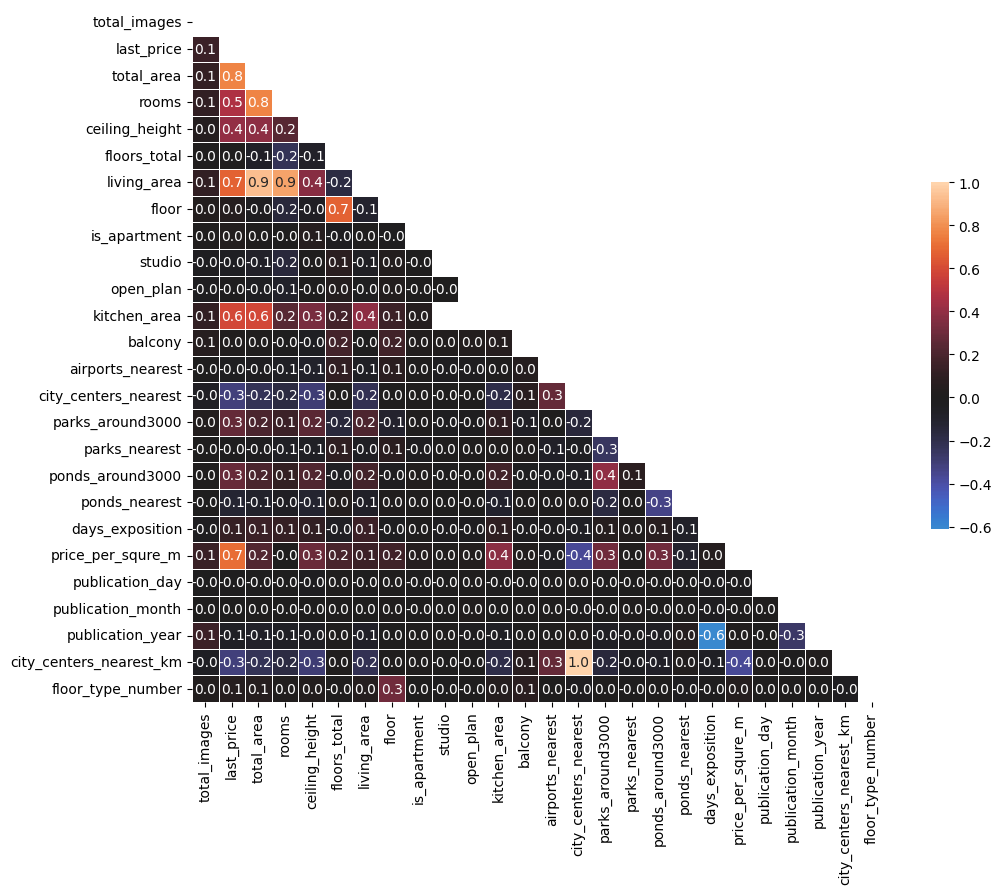

In [ ]:
corr = data.corr(method="pearson")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9));

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

### 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выдем населённые пункты с самой высокой и низкой стоимостью квадратного метра.

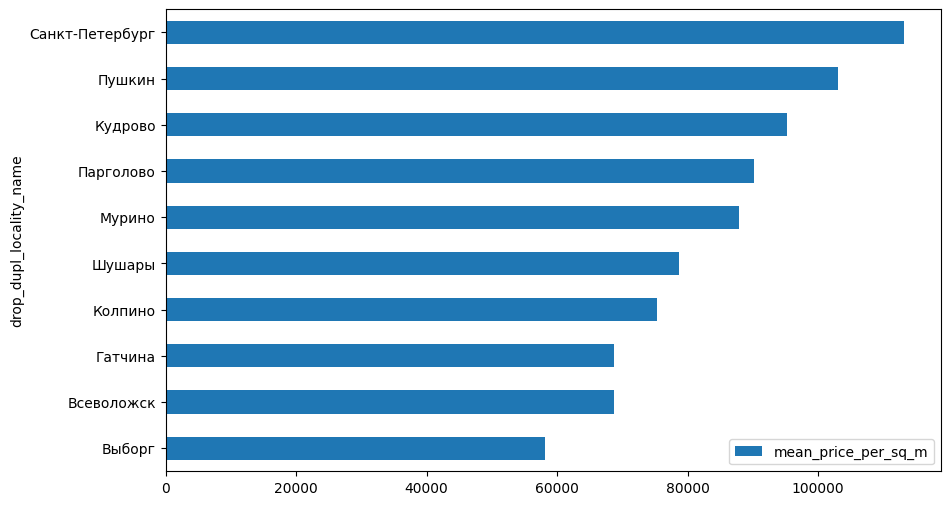

In [ ]:
# Создаем сводную таблицу с названием населенных пунктов, средней ценой за квадратный метр и количеством объявлений
top_10 = data.pivot_table(index='drop_dupl_locality_name', values='price_per_squre_m', aggfunc=['mean', 'count'])
# Переименуем столбцы
top_10.columns=['mean_price_per_sq_m', 'count_publications']
# Отсортируем таблицу по самым популярным населенным пунктам по количеству публикаций
top_10.sort_values(by='count_publications', ascending=False, inplace=True)
# Удалим количество публикаций
top_10.drop(columns='count_publications', inplace=True)
top_10 = top_10[:10]
top_10.sort_values(by='mean_price_per_sq_m', ascending=True).plot(kind='barh', figsize=(10, 6));

### 4.5. Выделим квартиры в Санкт-петербурге и найдем среднюю цену каждого километра

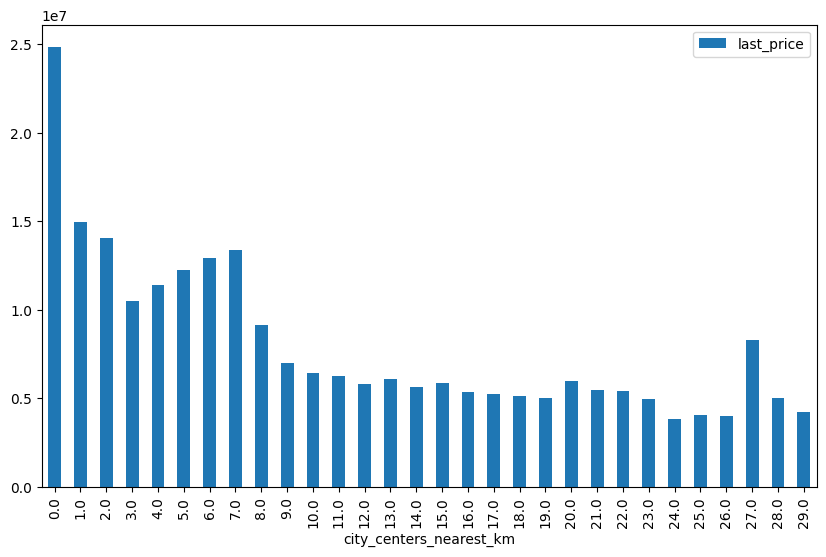

In [ ]:
(data[data['drop_dupl_locality_name'] == 'Санкт-Петербург']
 .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
 .plot(kind='bar', figsize=(10, 6)));

Как видно из графика недвижимость до 2 километров стоит в среднем намного дороже, чем остальная недвижимость.

От 3 до 7 км цена меньше, чем до 2 км, но все еще сравнима

От 8 до 27 км цена сильно ниже, раза в 1.5

Есть пик на 27 км, скорее всего там находится элитный район

# 5. Общий вывод

В ходе работы над проектом были проделаны следующие шаги:
- очистка данных (удалены пропуски в 5 столбцах, удалены аномальные значения, изменены типы данных на более подходящие, удалены неявные дубликаты населенных пунктов)
- добавление столбцов для последующего анализа
- проведен исследовательский анализ данных (выяснили, что чаще всего продают 2-ухкомнатные квартиры, в 13 км от центра. Исследовали как быстро продаются квартиры, нашли границу между быстрыми, долгими и необычайно долгими продажами, 180 и 500 дней, соответственно)
- нашли какие факторы влияют на стоимость квартиры (площадь и количество комнат)
- вывели 10 популярных населенных пунктов по убыванию стоимости квадратного метра
- узнали как стоимость зависит от расстояния до центра города

В дальнейшем хорошо было бы узнать откуда пик в цене на 27 км от центра города